In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Aishwarya Suresh\\Downloads'

In [3]:
os.chdir("H:/Data Sets/Project")

In [4]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
df1=pd.read_csv("bank-data.csv")

In [5]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
pd.crosstab(df1['job'],df1['education'],margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,All
job,,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249,10422
blue-collar,2318,1426,3623,878,8,453,94,454,9254
entrepreneur,137,71,210,234,2,135,610,57,1456
housemaid,474,77,94,174,1,59,139,42,1060
management,100,85,166,298,0,89,2063,123,2924
retired,597,75,145,276,3,241,285,98,1720
self-employed,93,25,220,118,3,168,765,29,1421
services,132,226,388,2682,0,218,173,150,3969
student,26,13,99,357,0,43,170,167,875


In [7]:
df1.loc[(df1['age']>60) & (df1['job']=='unknown'), 'job'] = 'retired'
df1.loc[(df1['education']=='unknown') & (df1['job']=='management'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='services'), 'education'] = 'high.school'
df1.loc[(df1['education']=='unknown') & (df1['job']=='housemaid'), 'education'] = 'basic.4y'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.4y'), 'job'] = 'blue-collar'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.6y'), 'job'] = 'blue-collar'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='basic.9y'), 'job'] = 'blue-collar'
df1.loc[(df1['job']=='unknown') & (df1['education']=='professional.course'), 'job'] = 'technician'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='high.school'), 'job'] = 'admin.'
df1.loc[(df1['job'] == 'unknown') & (df1['education']=='university.degree'), 'job'] = 'management'
df1.loc[(df1['education']=='unknown') & (df1['job']=='admin.'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='blue-collar'), 'education'] = 'basic.9y'
df1.loc[(df1['education']=='unknown') & (df1['job']=='entrepreneur'), 'education'] = 'university.degree'
df1.loc[(df1['education']=='unknown') & (df1['job']=='retired'), 'education'] = 'basic.4y'
df1.loc[(df1['education']=='unknown') & (df1['job']=='self-employed'), 'education'] = 'university.degree'
df1.loc[(df1['education'] == 'unknown') & (df1['job']=='student'), 'education'] = 'high.school'
df1.loc[(df1['education'] == 'unknown') & (df1['job']=='technician'), 'education'] = 'professional.course'
df1.loc[(df1['education'] == 'unknown') & (df1['job']=='unemployed'), 'education'] = 'university.degree'
df1['job'].replace(['unknown'],['admin.'],inplace=True)
df1['education'].replace(['unknown'],['university.degree'],inplace=True)

In [8]:
pd.crosstab(df1['job'],df1['education'],margins=True)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,All
job,,,,,,,,
admin.,77,151,499,3366,1,363,6119,10576
blue-collar,2366,1448,4108,878,8,453,94,9355
entrepreneur,137,71,210,234,2,135,667,1456
housemaid,516,77,94,174,1,59,139,1060
management,100,85,166,298,0,89,2230,2968
retired,713,75,145,276,3,243,286,1741
self-employed,93,25,220,118,3,168,794,1421
services,132,226,388,2832,0,218,173,3969
student,26,13,99,524,0,43,170,875


In [9]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,unknown,yes,All
marital,,,,
divorced,2092,121,2399,4612
married,11389,588,12951,24928
single,5097,280,6191,11568
unknown,44,1,35,80
All,18622,990,21576,41188


In [10]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4703,229,5644,10576
blue-collar,4362,241,4752,9355
entrepreneur,641,36,779,1456
housemaid,491,29,540,1060
management,1381,73,1514,2968
retired,789,44,908,1741
self-employed,641,40,740,1421
services,1818,101,2050,3969
student,381,23,471,875


In [11]:
df1['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
df1.loc[(df1['marital']=='unknown') & (df1['education']=='student'), 'marital'] = 'single'
df1.loc[(df1['marital']=='unknown'), 'marital'] = 'married'

In [13]:
df1['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [14]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,unknown,yes,All
marital,,,,
divorced,2092,121,2399,4612
married,11433,589,12986,25008
single,5097,280,6191,11568
All,18622,990,21576,41188


In [15]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,unknown,yes,All
job,,,,
admin.,4703,229,5644,10576
blue-collar,4362,241,4752,9355
entrepreneur,641,36,779,1456
housemaid,491,29,540,1060
management,1381,73,1514,2968
retired,789,44,908,1741
self-employed,641,40,740,1421
services,1818,101,2050,3969
student,381,23,471,875


In [16]:
pd.crosstab(df1['job'],df1['marital'],margins=True)

marital,divorced,married,single,All
job,,,,
admin.,1285,5392,3899,10576
blue-collar,731,6775,1849,9355
entrepreneur,179,1074,203,1456
housemaid,161,780,119,1060
management,332,2115,521,2968
retired,352,1293,96,1741
self-employed,133,909,379,1421
services,532,2300,1137,3969
student,9,42,824,875


In [17]:
df1.loc[(df1['marital']=='married') & (df1['job']=='admin.') & (df1['housing']=='unknown'), 'housing'] = 'yes'
df1.loc[(df1['marital']!='married') & (df1['job']!='admin.') & (df1['housing']=='unknown'), 'housing'] = 'no'
df1.loc[(df1['marital']!='married') & (df1['job']=='admin.') & (df1['housing']=='unknown'), 'housing'] = 'no'
df1.loc[(df1['marital']=='married') & (df1['job']!='admin.') & (df1['housing']=='unknown'), 'housing'] = 'yes'

In [18]:
pd.crosstab(df1['marital'],df1['housing'],margins=True)

housing,no,yes,All
marital,,,
divorced,2213,2399,4612
married,11433,13575,25008
single,5377,6191,11568
All,19023,22165,41188


In [19]:
pd.crosstab(df1['job'],df1['housing'],margins=True)

housing,no,yes,All
job,,,
admin.,4817,5759,10576
blue-collar,4439,4916,9355
entrepreneur,647,809,1456
housemaid,499,561,1060
management,1406,1562,2968
retired,797,944,1741
self-employed,655,766,1421
services,1862,2107,3969
student,404,471,875


In [20]:
pd.crosstab(df1['marital'],df1['loan'],margins=True)

loan,no,unknown,yes,All
marital,,,,
divorced,3816,121,675,4612
married,20634,589,3785,25008
single,9500,280,1788,11568
All,33950,990,6248,41188


In [21]:
pd.crosstab(df1['job'],df1['loan'],margins=True)

loan,no,unknown,yes,All
job,,,,
admin.,8614,229,1733,10576
blue-collar,7730,241,1384,9355
entrepreneur,1214,36,206,1456
housemaid,877,29,154,1060
management,2447,73,448,2968
retired,1452,44,245,1741
self-employed,1186,40,195,1421
services,3267,101,601,3969
student,710,23,142,875


In [22]:
df1.loc[(df1['marital']=='married') & (df1['job']!='admin') & (df1['loan']=='unknown'), 'loan'] = 'yes'
df1.loc[(df1['marital']!='married') & (df1['job']!='admin') & (df1['loan']=='unknown'), 'loan'] = 'no'


In [23]:
pd.crosstab(df1['marital'],df1['loan'],margins=True)

loan,no,yes,All
marital,,,
divorced,3937,675,4612
married,20634,4374,25008
single,9780,1788,11568
All,34351,6837,41188


In [24]:
pd.crosstab(df1['job'],df1['default'],margins=True)

default,no,unknown,yes,All
job,,,,
admin.,9182,1394,0,10576
blue-collar,6148,3207,0,9355
entrepreneur,1155,301,0,1456
housemaid,741,319,0,1060
management,2508,460,0,2968
retired,1344,397,0,1741
self-employed,1139,282,0,1421
services,3053,916,0,3969
student,771,104,0,875


In [25]:
pd.crosstab(df1['marital'],df1['default'],margins=True)

default,no,unknown,yes,All
marital,,,,
divorced,3781,831,0,4612
married,18724,6281,3,25008
single,10083,1485,0,11568
All,32588,8597,3,41188


In [26]:
pd.crosstab(df1['education'],df1['default'],margins=True)

default,no,unknown,yes,All
education,,,,
basic.4y,2595,1735,0,4330
basic.6y,1441,851,0,2292
basic.9y,4676,1823,0,6499
high.school,8157,1674,1,9832
illiterate,11,7,0,18
professional.course,4604,849,2,5455
university.degree,11104,1658,0,12762
All,32588,8597,3,41188


In [27]:
df1['default'].replace(['unknown'],['no'],inplace=True)

In [28]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df1['marital'].replace(['married','single','divorced'],[0,1,2],inplace=True)

In [30]:
df1['marital']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        1
10       0
11       1
12       1
13       2
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       1
23       1
24       0
25       0
26       0
27       0
28       1
29       0
        ..
41158    2
41159    2
41160    0
41161    0
41162    0
41163    2
41164    0
41165    2
41166    0
41167    0
41168    0
41169    0
41170    2
41171    0
41172    1
41173    0
41174    0
41175    1
41176    2
41177    0
41178    0
41179    2
41180    0
41181    0
41182    1
41183    0
41184    0
41185    0
41186    0
41187    0
Name: marital, Length: 41188, dtype: int64

In [31]:
df1['job'].replace(['admin.','blue-collar','technician','services','management','retired','entrepreneur','self-employed','housemaid','unemployed','student'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)


In [32]:
df1['job']

0         8
1         3
2         3
3         0
4         3
5         3
6         0
7         1
8         2
9         3
10        1
11        3
12        1
13        8
14        1
15        5
16        1
17        1
18        1
19        4
20        9
21        1
22        5
23        2
24        0
25        2
26        2
27        7
28        2
29        4
         ..
41158     2
41159     2
41160     0
41161     0
41162     1
41163     2
41164     0
41165     8
41166     0
41167     0
41168     6
41169     3
41170     4
41171    10
41172     0
41173     5
41174     5
41175    10
41176     8
41177     5
41178     5
41179     5
41180     0
41181     0
41182     9
41183     5
41184     1
41185     5
41186     2
41187     5
Name: job, Length: 41188, dtype: int64

In [33]:
df1['education'].replace(['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','illiterate'],[0,1,2,3,4,5,6],inplace=True)

In [34]:
df1['default'].replace(['no','yes'],[0,1],inplace=True)

In [35]:
df1['housing'].replace(['yes','no'],[0,1],inplace=True)

In [36]:
df1['loan'].replace(['no','yes'],[0,1],inplace=True)

In [37]:
df1['contact'].replace(['cellular','telephone',],[0,1],inplace=True)

In [38]:
df1['month'].replace(['may','jul','aug','jun','nov','apr','oct','sep','mar','dec'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

In [39]:
df1['day_of_week'].replace(['thu','mon','wed','tue','fri'],[0,1,2,3,4],inplace=True)

In [40]:
df1['poutcome'].replace(['nonexistent','failure','success'],[0,1,2],inplace=True)

In [41]:
df1['y'].replace(['no','yes'],[0,1],inplace=True)

In [42]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,8,0,4,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,5,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,1,0,1,1,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,3,0,2,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,0,3,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,0,2,0,1,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,2,1,3,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,3,1,1,0,0,0,1,0,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


# pair plots

C:\Users\Aishwarya Suresh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


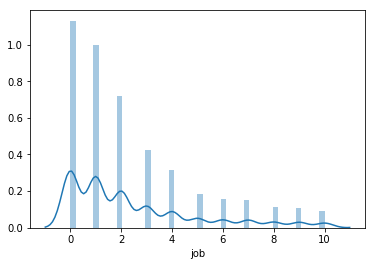

In [43]:
import seaborn as sns

sns.distplot(df1['job'])

C:\Users\Aishwarya Suresh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


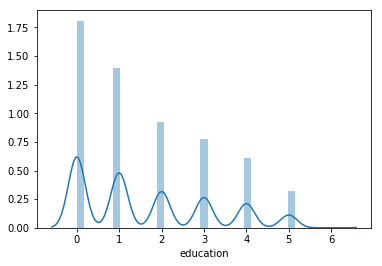

In [44]:
sns.distplot(df1['education'])

C:\Users\Aishwarya Suresh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


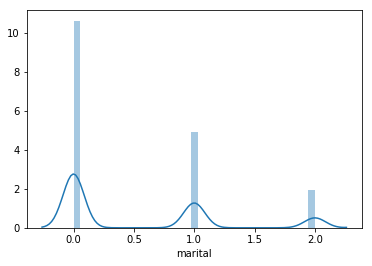

In [45]:
sns.distplot(df1['marital'])

C:\Users\Aishwarya Suresh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


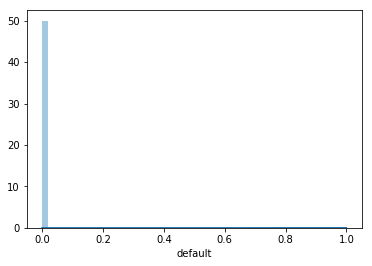

In [46]:
sns.distplot(df1['default'])

C:\Users\Aishwarya Suresh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


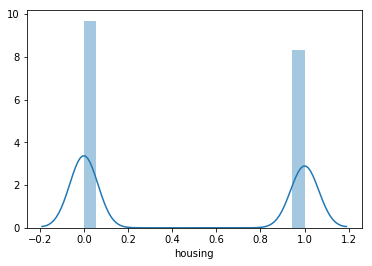

In [47]:
sns.distplot(df1['housing'])

C:\Users\Aishwarya Suresh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


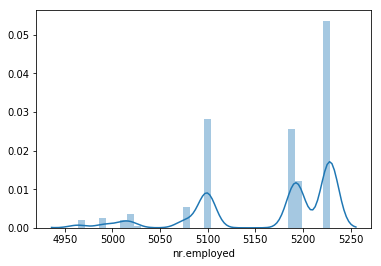

In [48]:
sns.distplot(df1['nr.employed'])

In [49]:
df1['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

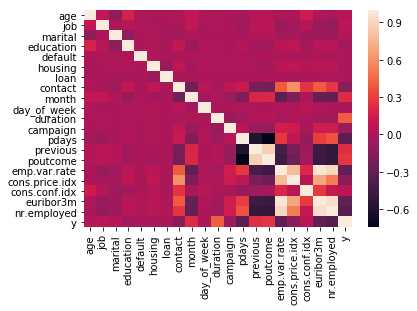

In [50]:
import seaborn as sns
corr=df1.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [51]:
df1.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.093138,-0.116581,0.177227,0.001891,-0.004345,0.000780,0.007021,0.093110,0.016189,...,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.093138,1.000000,-0.000334,0.039653,0.006229,-0.003189,-0.008270,-0.007482,0.091163,-0.007171,...,-0.015393,-0.058682,0.057264,0.055232,-0.082824,-0.031209,0.034408,-0.075015,-0.095077,0.059513
marital,-0.116581,-0.000334,1.000000,-0.118511,-0.006258,0.014152,-0.029703,-0.043604,0.014834,-0.003126,...,0.000403,-0.016699,0.028844,0.028815,-0.047892,-0.023771,-0.051051,-0.053781,-0.049536,0.025622
education,0.177227,0.039653,-0.118511,1.000000,0.003734,0.007244,-0.002788,0.087659,-0.080927,0.007415,...,0.000432,0.032986,-0.036904,-0.036228,0.055169,0.079410,-0.031592,0.046691,0.043384,-0.041816
default,0.001891,0.006229,-0.006258,0.003734,1.000000,0.003506,-0.003808,-0.006474,0.003187,0.006333,...,-0.003803,0.001668,0.002766,0.003061,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,-0.004345,-0.003189,0.014152,0.007244,0.003506,1.000000,-0.078626,0.079074,-0.029670,0.021087,...,0.011334,0.009788,-0.021282,-0.022769,0.057288,0.077598,0.032984,0.056705,0.043613,-0.010785
loan,0.000780,-0.008270,-0.029703,-0.002788,-0.003808,-0.078626,1.000000,-0.005452,-0.010044,0.002107,...,0.004414,0.001190,-0.000995,-0.001379,0.004741,0.000256,-0.011074,0.002630,0.006082,-0.005617
contact,0.007021,-0.007482,-0.043604,0.087659,-0.006474,0.079074,-0.005452,1.000000,-0.226851,0.052376,...,0.077368,0.117970,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.093110,0.091163,0.014834,-0.080927,0.003187,-0.029670,-0.010044,-0.226851,1.000000,-0.032484,...,-0.067502,-0.173904,0.189731,0.201397,-0.313826,-0.181645,-0.011543,-0.273407,-0.288111,0.222684
day_of_week,0.016189,-0.007171,-0.003126,0.007415,0.006333,0.021087,0.002107,0.052376,-0.032484,1.000000,...,0.000640,0.010015,0.002176,0.000095,0.005231,0.011271,0.040239,0.012444,0.002146,-0.003525


In [52]:
x=df1.loc[:,['nr.employed','euribor3m','emp.var.rate','pdays','duration']]

In [53]:
y=df1.iloc[:,-1]

In [54]:
x

,nr.employed,euribor3m,emp.var.rate,pdays,duration
0,5191.0,4.857,1.1,999,261
1,5191.0,4.857,1.1,999,149
2,5191.0,4.857,1.1,999,226
3,5191.0,4.857,1.1,999,151
4,5191.0,4.857,1.1,999,307
5,5191.0,4.857,1.1,999,198
6,5191.0,4.857,1.1,999,139
7,5191.0,4.857,1.1,999,217
8,5191.0,4.857,1.1,999,380
9,5191.0,4.857,1.1,999,50


In [55]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [56]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [57]:
x_train

,nr.employed,euribor3m,emp.var.rate,pdays,duration
35600,5099.1,1.244,-1.8,999,325
29254,5099.1,1.405,-1.8,999,232
33193,5099.1,1.291,-1.8,999,347
7160,5191.0,4.860,1.1,999,565
14148,5228.1,4.962,1.4,999,329
7882,5228.1,4.865,1.4,999,273
23875,5228.1,4.963,1.4,999,122
14078,5228.1,4.962,1.4,999,151
4033,5191.0,4.858,1.1,999,35
7879,5228.1,4.865,1.4,999,193


In [58]:
x_test

,nr.employed,euribor3m,emp.var.rate,pdays,duration
12925,5228.1,4.962,1.4,999,266
8457,5228.1,4.864,1.4,999,94
6557,5191.0,4.857,1.1,999,209
14496,5228.1,4.961,1.4,999,109
15594,5228.1,4.960,1.4,999,83
16828,5228.1,4.962,1.4,999,142
12831,5228.1,4.962,1.4,999,114
33030,5099.1,1.299,-1.8,999,170
27231,5195.8,4.021,-0.1,999,162
3882,5191.0,4.859,1.1,999,186


In [59]:
y_train

35600    0
29254    0
33193    0
7160     0
14148    0
7882     0
23875    0
14078    0
4033     0
7879     0
26117    0
27737    1
538      0
31974    0
36102    0
11402    0
10585    0
37212    0
1380     0
33465    0
9127     0
15619    0
36655    0
16180    0
20513    1
26002    0
12712    0
1256     1
23784    0
28772    0
        ..
29089    0
35383    0
1580     0
34759    0
20681    0
3879     0
1455     0
36543    0
19887    0
27506    0
23157    0
22821    0
39519    0
34406    0
26093    0
13094    0
1438     0
16557    0
36878    1
35817    0
15269    1
23700    0
12689    0
25200    0
24671    0
17682    0
22708    0
22264    0
34828    0
30677    0
Name: y, Length: 32950, dtype: int64

In [60]:
y_test

12925    0
8457     0
6557     0
14496    0
15594    0
16828    0
12831    0
33030    0
27231    0
3882     0
24452    0
11568    0
12035    0
7228     0
31882    0
21495    0
32890    0
39246    1
21158    0
27975    0
9212     0
37544    1
8940     0
29016    0
14191    0
964      0
57       0
11122    0
36280    0
20037    0
        ..
25306    0
23751    0
6328     0
25852    0
26894    0
22432    1
30577    0
10146    0
4901     0
7929     0
1666     0
19332    0
6682     0
19869    0
36887    0
10762    0
9691     0
27404    0
8002     0
19282    0
38091    1
31529    0
210      0
23188    0
31308    0
35025    0
4909     0
39547    1
30935    0
11139    0
Name: y, Length: 8238, dtype: int64

In [61]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
y_pred=clf.predict(x_test)

In [63]:
print("actual test data")
print(y_test.values)

actual test data
[0 0 0 ... 1 0 0]


In [64]:
print("predicted test data")
print(y_pred)

predicted test data
[0 0 0 ... 1 0 0]


In [65]:
#accuracy score on test an train
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [66]:
print("\nAcccuracyscore:%f"%(accuracy_score(y_test,y_pred)*100))


Acccuracyscore:90.288905


In [67]:
print("\nRecallscore:%f"%(recall_score(y_test,y_pred)*100))


Recallscore:46.511628


In [68]:
print("\nROC score:%f"%(roc_auc_score(y_test,y_pred)*100))


ROC score:71.094941


In [69]:
print(confusion_matrix(y_test,y_pred))
#normalize the numeric variables from column2 to column 31 in the data frame
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

[[7018  317]
 [ 483  420]]


array([[0.85973535, 0.95737928, 0.9375    , 1.        , 0.05307035],
       [0.85973535, 0.95737928, 0.9375    , 1.        , 0.03029687],
       [0.85973535, 0.95737928, 0.9375    , 1.        , 0.04595364],
       ...,
       [0.        , 0.08932215, 0.47916667, 1.        , 0.03843026],
       [0.        , 0.08932215, 0.47916667, 1.        , 0.08987393],
       [0.        , 0.08932215, 0.47916667, 1.        , 0.04859699]])

In [70]:
probas=clf.predict_proba(x_test)

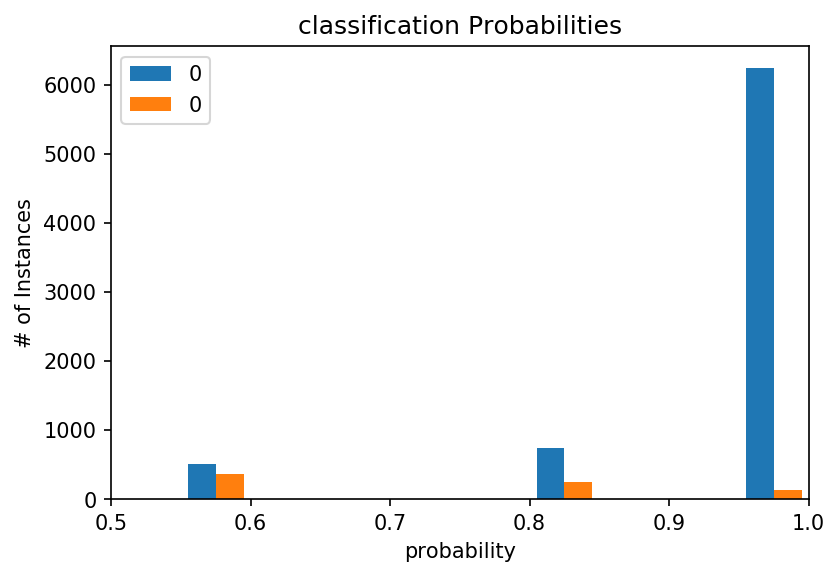

In [71]:
#visulaize the properties
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas,bins=20)
plt.title('classification Probabilities')
plt.xlabel('probability')
plt.ylabel('# of Instances')
plt.xlim([0.5,1.0])
plt.legend(y_test)
plt.show()


In [72]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.transform(x_test)

In [73]:
# Evaluation metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [74]:
#print cross validation score for KNN
clf_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)

In [75]:
clf_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')
clf_scores=clf_proba[:,1] #get the score of the positive class

In [76]:
clf_acc

array([0.90604516, 0.90859432, 0.90539064])

# Logistic Regression

In [77]:
#build a logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_scores=lr_proba[:,1]
lr_acc

array([0.90477058, 0.90741078, 0.90639228])

In [78]:
# predict on test data
y_pred=lr.predict(x_test)


In [79]:
print("actual test data")
print(y_test.values)

actual test data
[0 0 0 ... 1 0 0]


In [80]:
print("predicted test data")
print(y_pred)

predicted test data
[0 0 0 ... 0 0 0]


In [81]:
#accuracy score on test an train
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

In [82]:
print("\nAcccuracyscore:%f"%(accuracy_score(y_test,y_pred)*100))


Acccuracyscore:91.005098


In [83]:
print("\nRecallscore:%f"%(recall_score(y_test,y_pred)*100))


Recallscore:38.981174


In [84]:
print("\nROC score:%f"%(roc_auc_score(y_test,y_pred)*100))


ROC score:68.195427


In [85]:
print(confusion_matrix(y_test,y_pred))

[[7145  190]
 [ 551  352]]


# Decision tree classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()


dtc_clf.fit(x_train,y_train)
dtc_clf.score(x_test,y_test)

0.8937848992473901

In [87]:
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
dtc_proba=cross_val_predict(dtc_clf,x_train_std,y_train,cv=3,method='predict_proba')
dtc_clf_scores=dtc_proba[:,1]
y_pred=dtc_clf.predict(x_test)
dtc_clf_acc

array([0.89302622, 0.89339039, 0.89018394])

In [88]:
print("\nAcccuracyscore:%f"%(accuracy_score(y_test,y_pred)*100))


Acccuracyscore:89.378490


In [89]:
print("\nROC score:%f"%(roc_auc_score(y_test,y_pred)*100))


ROC score:71.846107


In [90]:
print("\nRecallscore:%f"%(recall_score(y_test,y_pred)*100))


Recallscore:49.390919


In [91]:
print(confusion_matrix(y_test,y_pred))

[[6917  418]
 [ 457  446]]


# build random forest classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=6,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)

In [93]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)

In [94]:
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')
rmf_clf_scores=rmf_proba[:,1]
y_pred=rmf_clf.predict(x_test)

In [95]:
rmf_clf_acc

array([0.91332848, 0.91369264, 0.91167365])

In [96]:
print("\nAcccuracyscore:%f"%(accuracy_score(y_test,y_pred)*100))


Acccuracyscore:91.636319


In [97]:
print("\nROC score:%f"%(roc_auc_score(y_test,y_pred)*100))


ROC score:74.133642


In [98]:
print("\nRecallscore:%f"%(recall_score(y_test,y_pred)*100))


Recallscore:51.716501


In [99]:
print(confusion_matrix(y_test,y_pred))

[[7082  253]
 [ 436  467]]


# support vector classification

In [100]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)

In [101]:
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')
svc_scores=svc_proba[:,1]
svc_acc

array([0.89785142, 0.89721413, 0.8976507 ])

In [102]:
y_pred=svc.predict(x_test)
print("\nAcccuracyscore:%f"%(accuracy_score(y_test,y_pred)*100))


Acccuracyscore:89.657684


In [103]:
print("\nRecallscore:%f"%(recall_score(y_test,y_pred)*100))


Recallscore:28.128461


In [104]:
print("\nROC score:%f"%(roc_auc_score(y_test,y_pred)*100))


ROC score:62.680454


In [105]:
print(confusion_matrix(y_test,y_pred))

[[7132  203]
 [ 649  254]]


# ROC curves

In [106]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 0.89 


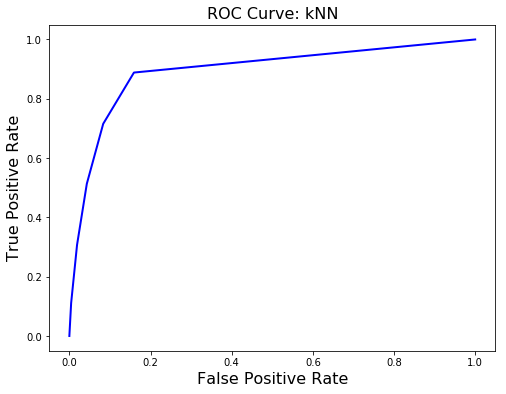

AUC Score (Logistic Regression): 0.92 


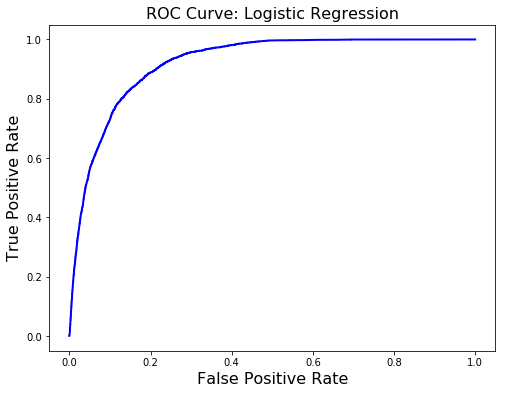

AUC Score (Support Vector Classification): 0.93 


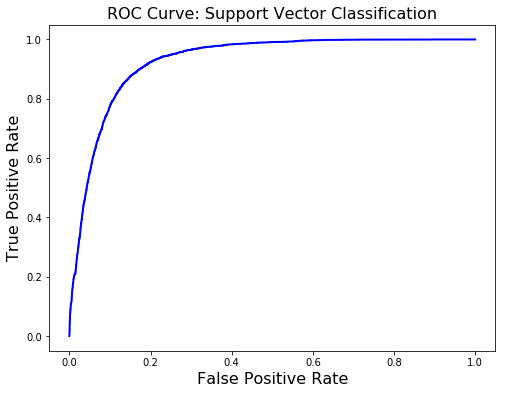

AUC Score (Decision Tree Classifier): 0.73 


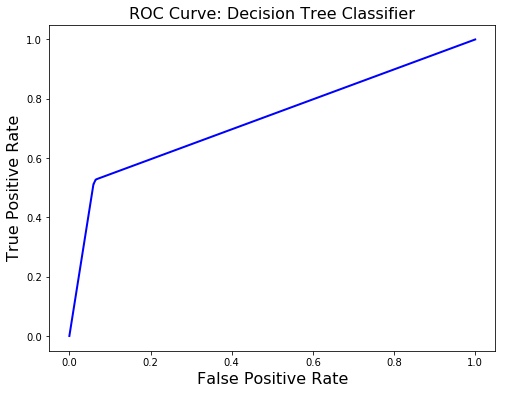

AUC Score (Random Forest Classifier): 0.94 


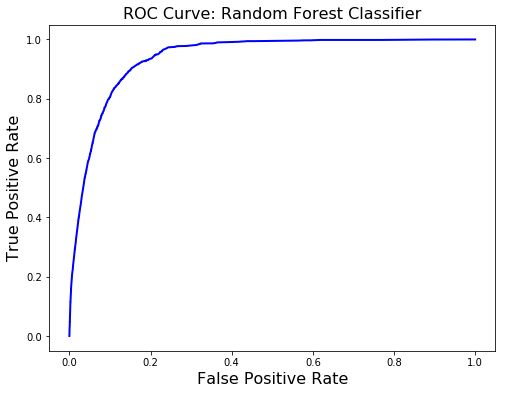

In [108]:
#Plot ROC Curve for each algorithm
ROC_curve('kNN', y_train, clf_scores)
ROC_curve('Logistic Regression', y_train, lr_scores)
ROC_curve('Support Vector Classification',y_train,svc_scores)
ROC_curve('Decision Tree Classifier',y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',y_train,rmf_clf_scores)

In [ ]:

.
